# Customer Segmentation using Kmeans Clustering

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv("Mall_Customers.csv")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [18]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
df.isnull().any().any()

False

### EDA

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

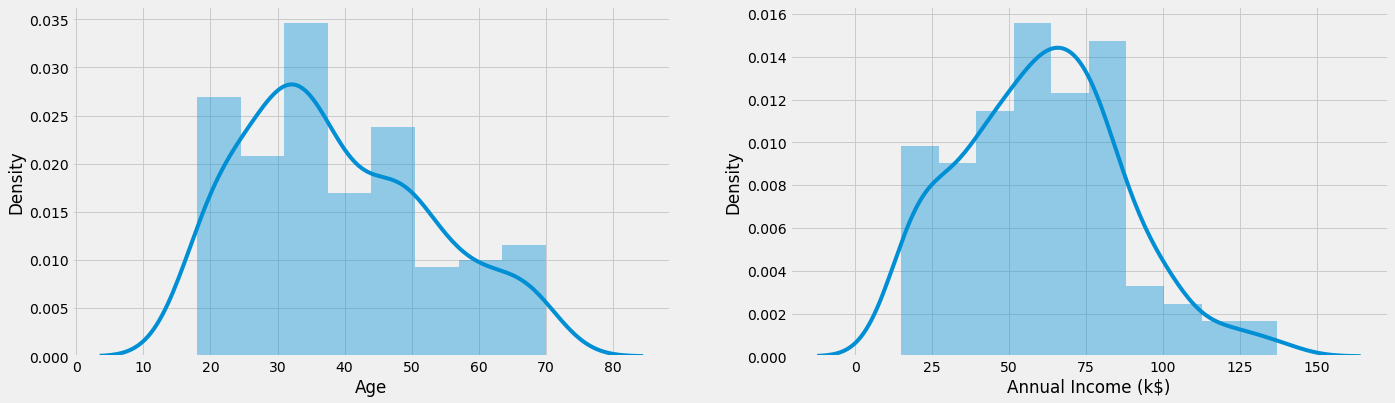

In [33]:
import warnings
warnings.filterwarnings('ignore')
ig, axes = plt.subplots(1,2, figsize=(21,6))
sns.distplot(df['Age'], ax=axes[0])
sns.distplot(df['Annual Income (k$)'], ax=axes[1])

<AxesSubplot:xlabel='Genre', ylabel='count'>

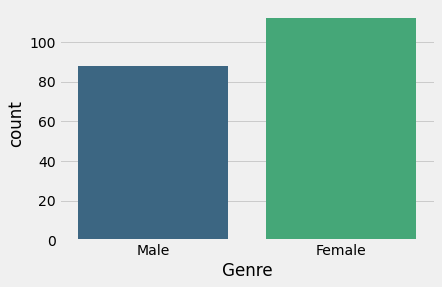

In [21]:
sns.countplot(x='Genre', data=df, palette='viridis')

<AxesSubplot:xlabel='Genre', ylabel='Spending Score (1-100)'>

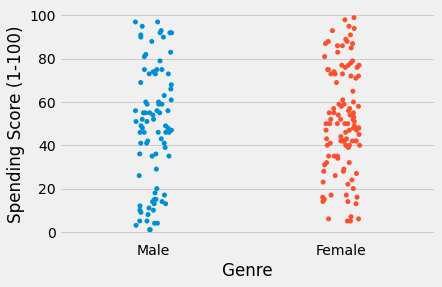

In [22]:
sns.stripplot(x='Genre', y = 'Spending Score (1-100)', data = df)

<AxesSubplot:xlabel='Genre', ylabel='Annual Income (k$)'>

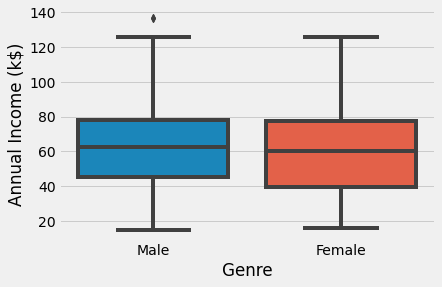

In [23]:
sns.boxplot( x= 'Genre', y = 'Annual Income (k$)', data = df )

In [29]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


KMeans Clustering

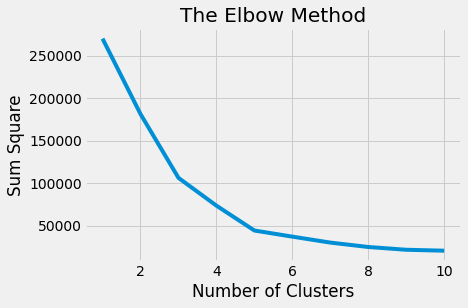

In [25]:
x=df.iloc[:,[3,4]].values
from sklearn.cluster import KMeans
wcss=[] # within cluster sum of square
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_) #inertia_ = to find the wcss value

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum Square')
plt.show()

In [26]:
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(x)

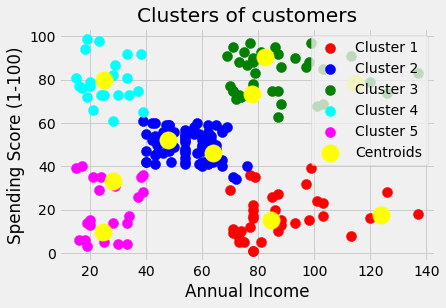

In [30]:
plt.style.use('fivethirtyeight')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Summary
Mall must focus more on Cluster 1, inspite of high annual income cluster 1's spendng score is low. Management can conduct a survey on the reviews of cluster 1 customers and then work on the weak areas to improve sales.
Moreover cluster 4 can also be considered for a survey as inspite of low annual income customers are spending more, management can note down points they appreciate about the services provided by the mall.

In [31]:
kmeans.cluster_centers_

array([[ 82.38888889,  90.44444444],
       [ 28.18181818,  33.27272727],
       [ 63.95238095,  46.21428571],
       [ 84.46428571,  15.32142857],
       [ 25.0952381 ,  80.04761905],
       [ 77.78571429,  73.28571429],
       [ 47.86046512,  51.97674419],
       [ 24.58333333,   9.58333333],
       [114.71428571,  78.42857143],
       [124.        ,  17.5       ]])